In [1]:
import silq
silq.initialize('Antimony', mode='analysis')
%matplotlib notebook

Initializing imports
Initializing functions
Initializing data
Initializing jupyter
Initializing logging
Initialization complete


# 1.4T with separated DF and DS

Below we see what happens when we vary each of the donor gates.
We start with `original scan`, where our desired transition is at DF(-0.32).
We then decrease each donor gate until the transition reaches DF(-0.26).

We see that RDF is more strongly coupled to the transition than LDF.
Furthermore, both DS 

<IPython.core.display.Javascript object>


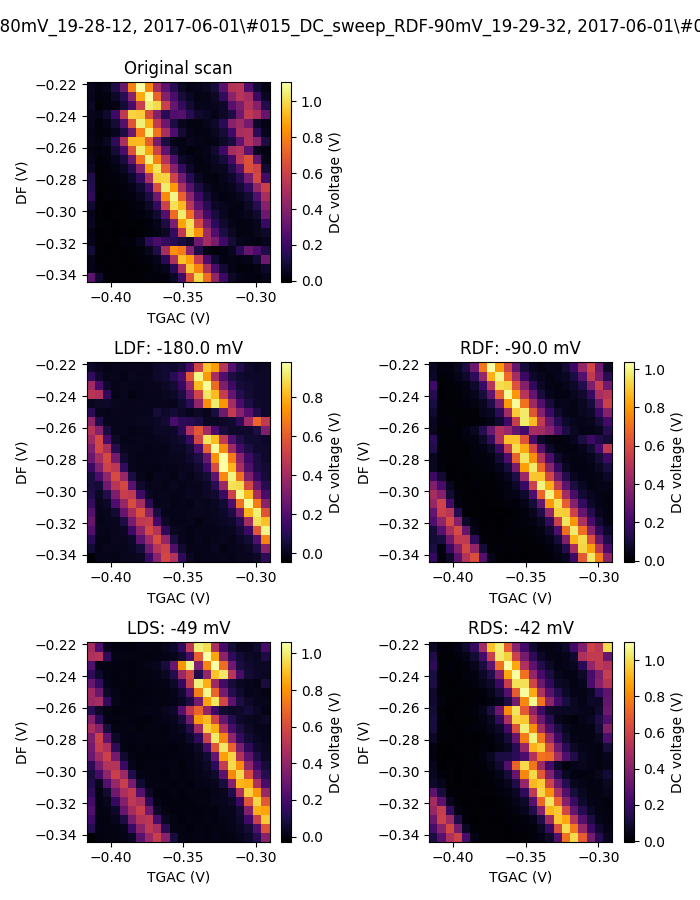

In [109]:
plot = MatPlot(subplots=(3,2), figsize=(7,9))
plot[1].set_visible(False)
data = load_data(r'2017-06-01\#013_DC_sweep_no_change_19-26-13')
plot[0].add(data.DC_voltage)
plot[0].set_title('Original scan')

data = load_data(r'2017-06-01\#014_DC_sweep_LDF-180mV_19-28-12')
plot[2].add(data.DC_voltage)
plot[2].set_title(f'LDF: {-463.5+283.5} mV')

data = load_data(r'2017-06-01\#015_DC_sweep_RDF-90mV_19-29-32')
plot[3].add(data.DC_voltage)
plot[3].set_title(f'RDF: {-373.5+283.5} mV')

data = load_data(r'2017-06-01\#016_DC_sweep_LDS-49mV_19-30-31')
plot[4].add(data.DC_voltage)
plot[4].set_title(f'LDS: {520-569} mV')

data = load_data('2017-06-01/#017_DC_sweep_RDS-42mV_19-32-59')
plot[5].add(data.DC_voltage)
plot[5].set_title(f'RDS: {527-569} mV')

# 1.4T measurements

## Good donor

A transition at 3T was found with very good contrast and blip duration.
We then moved to 1.4T to perform ESR.

<IPython.core.display.Javascript object>


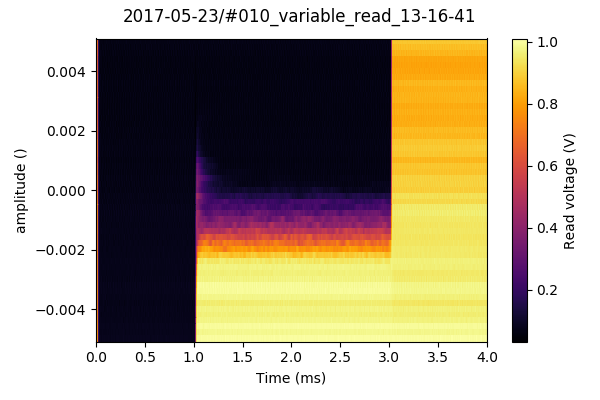

In [35]:
data = load_data('2017-05-23/#010_variable_read_13-16-41')
plot = MatPlot(data.read_voltage)

<IPython.core.display.Javascript object>


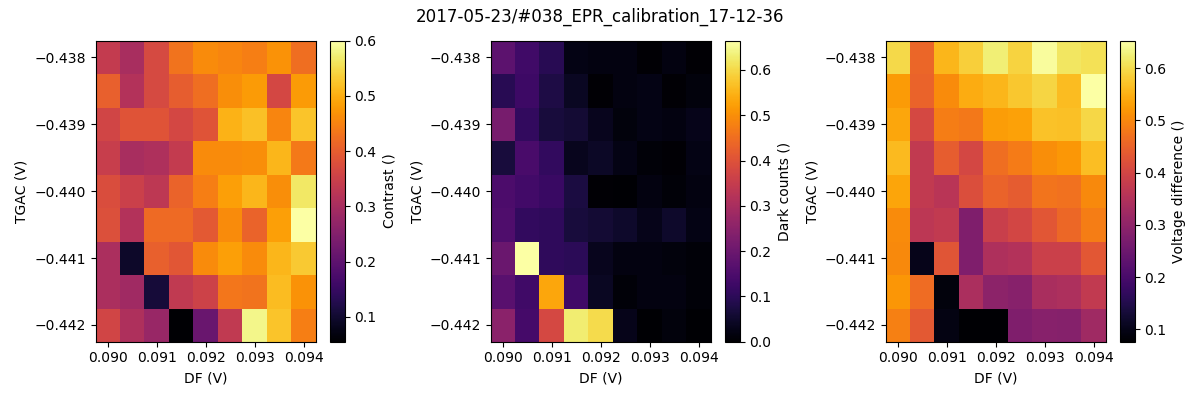

In [10]:
data = load_data('2017-05-23/#038_EPR_calibration_17-12-36')
plot = CalibrationPlot(data)

The contrast is very high. However, the traces show that there are slow blips mixed with fast ones.
The longer we stay in plunge, the likelier one of the slow transitions is loaded as well.
Due to this, the read stage shows slow blips as well, which make readout hard.

Performed DC scan to check if there is anything around the transition (blue dot), but it is quite clean.

<IPython.core.display.Javascript object>


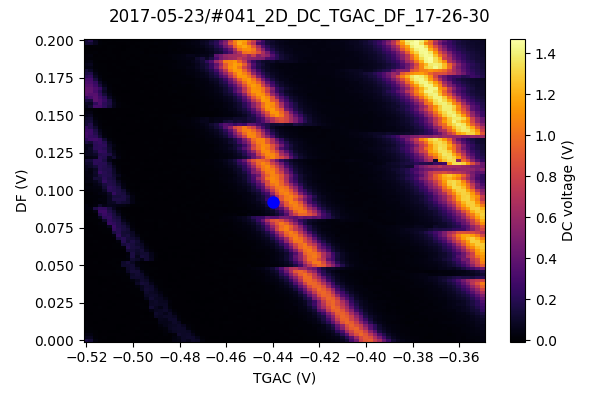

In [6]:
data = load_data('2017-05-23/#041_2D_DC_TGAC_DF_17-26-30')
plot = MatPlot(data.DC_voltage)
plot[0].plot(-0.44, 0.092, 'ob', ms=8)

Since we could not perform ESR nor T1 scans due to the plunge issue, we performed a DC scan instead.
The data seems quite noisy, and at high TGAC the transistor nearly opens.
The data does not seem very useful.

<IPython.core.display.Javascript object>


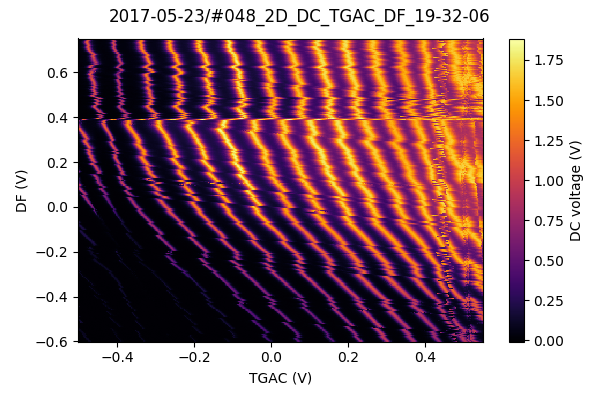

In [16]:
data = load_data('2017-05-23/#048_2D_DC_TGAC_DF_19-32-06')
MatPlot(data.DC_voltage)

In [17]:
data.SIM_voltages()

{'DF': 0.09,
 'DS': 0.65,
 'LB': 0.45,
 'RB': 0.4,
 'SRC': 0.128,
 'TG': 1.9,
 'TGAC': -0.4385}

## Refinding good donor

After the DC scan, the charge stability diagram also shifted.
The next step is to find the transition from before again.

Below is another donor with a good spin tail.
The duration of the blips show that it is a different donor than before.

<IPython.core.display.Javascript object>


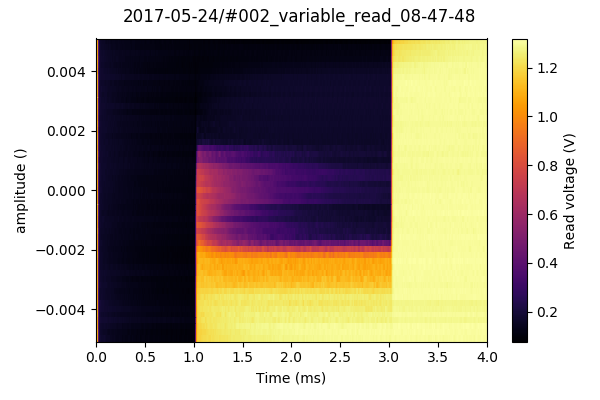

In [10]:
data = load_data('2017-05-24/#002_variable_read_08-47-48')
plot = MatPlot(data.read_voltage)

The above transition behaves very strange, it shows a near-100% contrast, as shown below.
It can be clearly seen that each of the traces shows a blip at the start.
Perhaps this is two coupled donors?

Contrast: 0.92


<IPython.core.display.Javascript object>


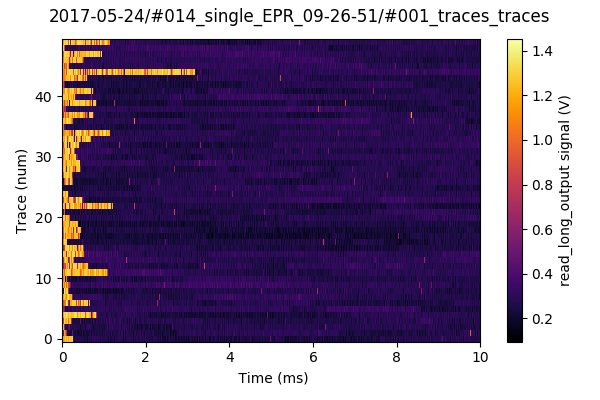

In [26]:
data = load_data('2017-05-24/#014_single_EPR_09-26-51')
print(f'Contrast: {data.contrast[0]}')

data = load_data('2017-05-24/#014_single_EPR_09-26-51/#001_traces_traces')
MatPlot(data.read_long_output)

## Different donor?

Another donor showed what might be a spin tail. Not sure though

<IPython.core.display.Javascript object>


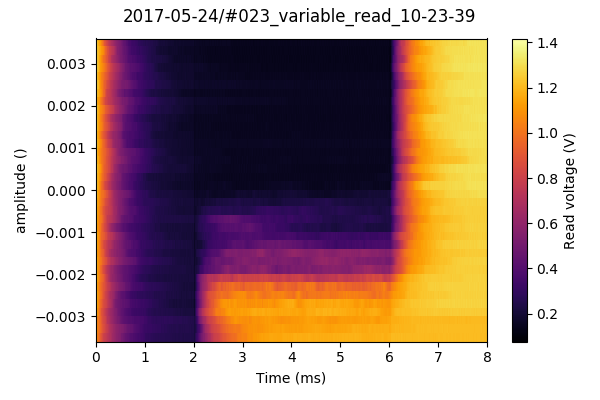

In [30]:
data = load_data('2017-05-24/#023_variable_read_10-23-39')
MatPlot(data.read_voltage)

Doing DC scan in the area

<IPython.core.display.Javascript object>


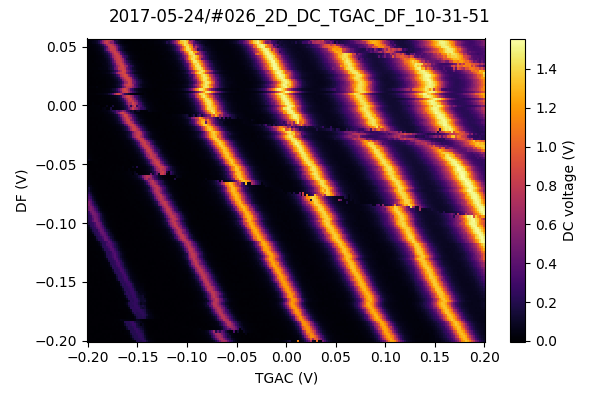

In [29]:
data = load_data('2017-05-24/#026_2D_DC_TGAC_DF_10-31-51')
MatPlot(data.DC_voltage)

## Coupled donor?

In the following transition, we have one fast transition, which has a nice and very long spin tail.
Furthermore, the contrast was 100%

<IPython.core.display.Javascript object>


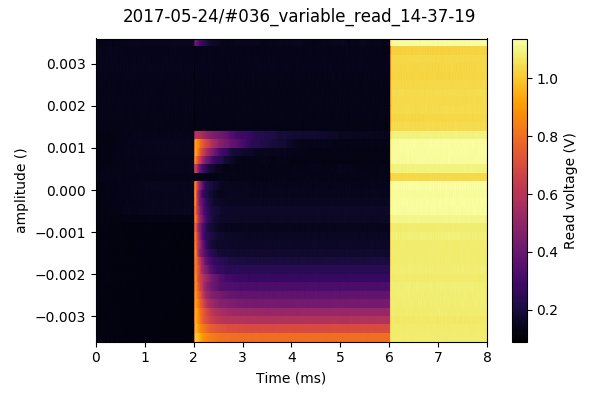

In [36]:
data = load_data('2017-05-24/#036_variable_read_14-37-19')
plot = MatPlot(data.read_voltage)

<IPython.core.display.Javascript object>


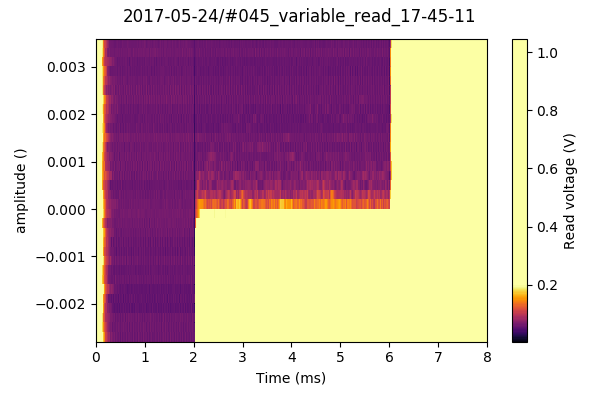

In [14]:
data = load_data('2017-05-24/#045_variable_read_17-45-11')
plot = MatPlot(data.read_voltage)
plot[0].qcodes_colorbar.set_clim(0, 0.2)

## Slow transition

<IPython.core.display.Javascript object>


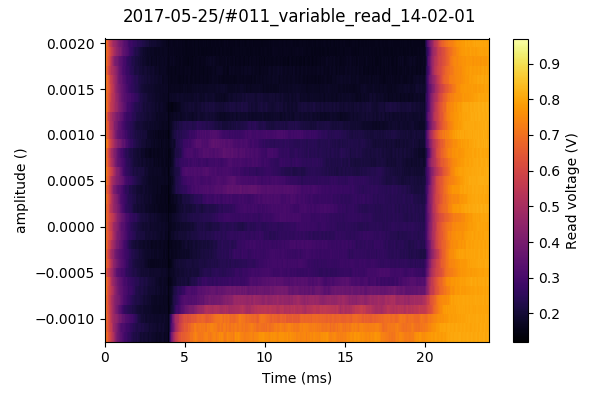

In [20]:
data = load_data('2017-05-25/#011_variable_read_14-02-01')
plot = MatPlot(data.read_voltage)

Increasing DS, while compensating with DF to stay at same transition.
The blips became much shorter.
This probably is due to the tunnel barrier from DS decreasing.
A spin tail is now clearly visible.

<IPython.core.display.Javascript object>


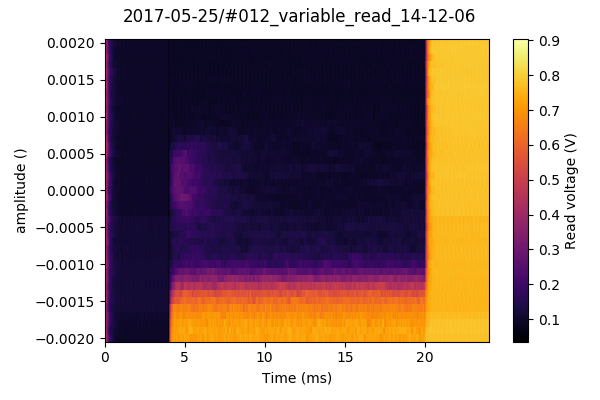

In [21]:
data = load_data('2017-05-25/#012_variable_read_14-12-06')
plot = MatPlot(data.read_voltage)

The transition looks very good, and contrast of 0.4 was obtained.
However,performing the scan later again resulted in 0 contrast.
The transition seems switchy

In [23]:
data = load_data('2017-05-25\#018_single_EPR_14-25-43')
print(f'Contrast: {data.contrast[0]}')

Contrast: 0.408407


The transition was quite jumpy, and so we played around quite a bit more with TGAC. For high TGAC, the tunnel coupling increased quite significantly. This somehow also resulted in a decrease of contrast. We then lowered TGAC and noticed the contrast increasing again. However, we were not able to get rid of the jumpiness. 

<IPython.core.display.Javascript object>


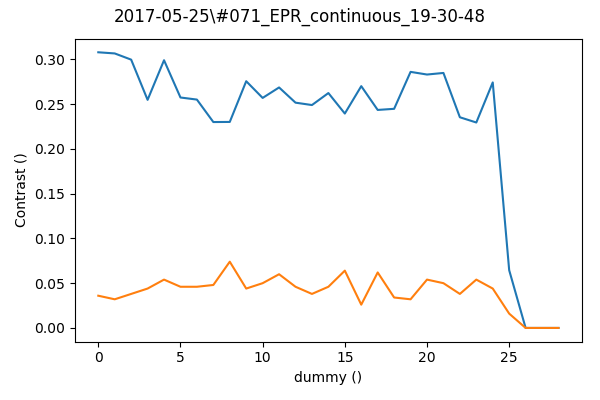

In [2]:
data = load_data('2017-05-25\#071_EPR_continuous_19-30-48')
plot = MatPlot(data.contrast)
plot.add(data.dark_counts)

For overnight scan we keep repeating a DC scan around the transition to see how often the system jumps and for how long

In [13]:
data = load_data('2017-05-25/#073_2D_DC_DF_TGAC_19-45-41')
x_vals = data.TGAC_set
y_vals=data.DF_set

<IPython.core.display.Javascript object>


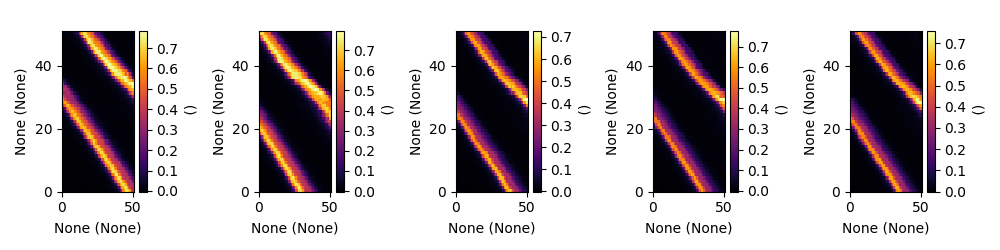

In [19]:
idx_vals = [0, 20, 40, 60, 80]
plot = MatPlot(subplots=(1, 5), figsize=(10, 2.5))
for k, idx in enumerate(idx_vals):
    plot[k].add(data.DC_voltage[idx])

## Finding reason behind jumpiness

We are not sure why the system is so jumpy, we switched several coulomb peaks but the problem persisted.
The problem could lie with the pulse sequences, perhaps settings up instruments has a chance of bringing the system out of tune.
We tried two cases, one where the instrument is set up each time, and one where they are all continuously running.
However, all of a sudden it did not go out of tune in both cases.

When we then performed an ESR scan, it did go out of tune.
We then waited a while, and it tuned back out of itself.

We then performed another ESR scan, and it seemed to behave well. We even saw a peak in contrast, which could well be an ESR peak.

A second measurement however showed 0 contrast, which could either mean that it was a false positive, that the system was out of tune the second time, or that the nucleus flipped.

<IPython.core.display.Javascript object>


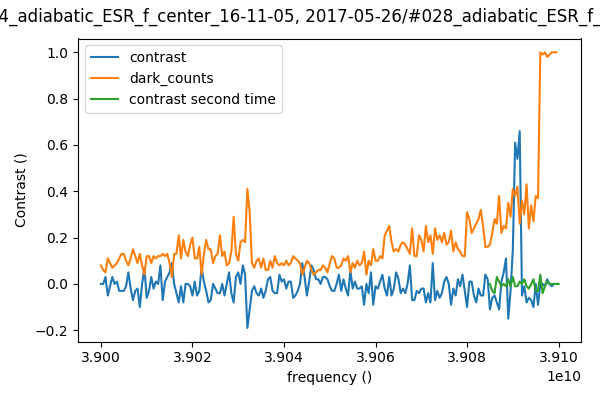

In [14]:
data = load_data('2017-05-26/#024_adiabatic_ESR_f_center_16-11-05')
plot = MatPlot()
plot.add(data.contrast, label='contrast')
plot.add(data.dark_counts, label='dark_counts')

data = load_data('2017-05-26/#028_adiabatic_ESR_f_center_16-44-55')
plot.add(data.contrast, label='contrast second time')

plt.legend()

The system is quite jumpy, the autotune partly solves it at the cost of significant overhead.
Still several scans need to be taken, as there are occasionally big jumps in the system.
Below we see three scans over a frequency range. It seems that there is a peak around 39.2 GHz.

<IPython.core.display.Javascript object>


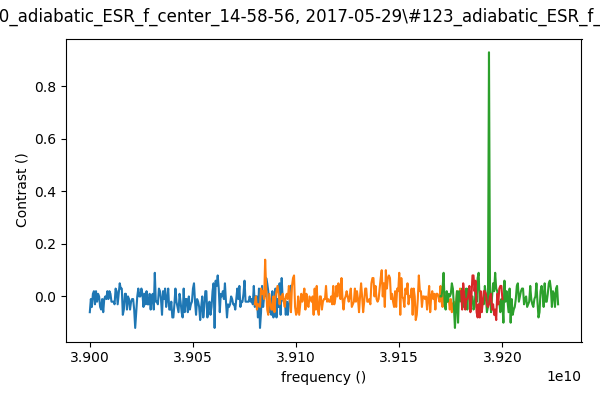

In [55]:
data = load_data(r'2017-05-29\#113_adiabatic_ESR_f_center_13-38-48')
plot = MatPlot(data.contrast)

data = load_data(r'2017-05-29\#120_adiabatic_ESR_f_center_14-58-56')
plot.add(data.contrast)

data = load_data(r'2017-05-29\#123_adiabatic_ESR_f_center_16-18-05')
plot.add(data.contrast)

data = load_data('2017-05-29/#124_adiabatic_ESR_f_center_16-47-21')
plot.add(data.contrast)

Below we see the variation in optimal tuning position over a night.
These measurements were done without ESR, so with ESR it might be even worse.

<IPython.core.display.Javascript object>


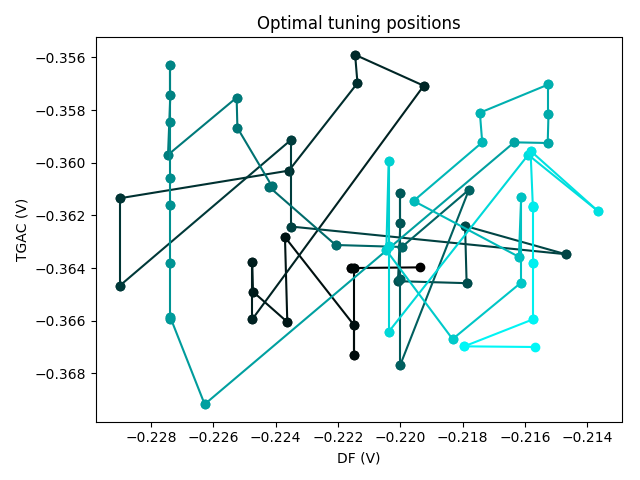

In [24]:
data = load_data('2017-05-29/#163_continuous_retune_22-04-13')


optimal_set_vals = data.optimal_set_vals
max_idx = np.where(~np.isnan(optimal_set_vals[:,0]))[0][-1]
optimal_set_vals = optimal_set_vals[:max_idx]
vals = [optimal_set_vals[:,0], optimal_set_vals[:,1]]
plt.figure()

# Segement plot and colour depending on T
s = 10 # Segment length
for i in range(0,len(vals[0])-1):
    plt.plot(vals[1][i:i+2], vals[0][i:i+2], 'o-',
            color=(0,i/len(vals[0]),i/len(vals[0])))
# plt.plot(*vals)
plt.xlabel('DF (V)')
plt.ylabel('TGAC (V)')
plt.title('Optimal tuning positions')
plt.tight_layout();

Perhaps the transition is not a donor. Some measurements at different gate voltages seemed to indicate that a longer plunge duration had a strong effect on the contrast. This could indicate that it's not a donor.

Below we go back to the gate voltages above, and perform multiple T1 measurements for relatively small durations.
The lack of any T1 decay suggests that it has a long T1

<IPython.core.display.Javascript object>


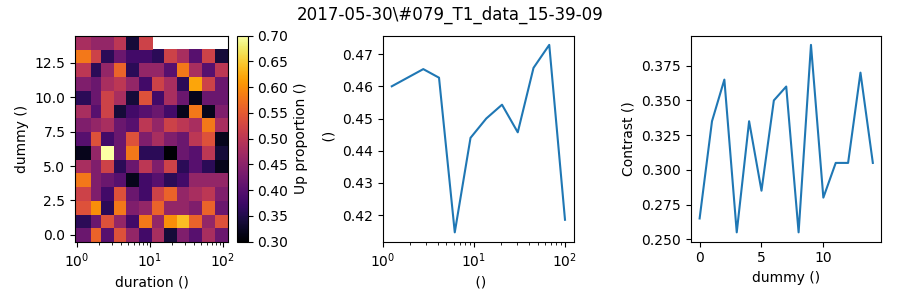

In [52]:
data = load_data(r'2017-05-30\#079_T1_data_15-39-09')
plot = MatPlot(subplots=3, figsize=(9, 3))
plot[0].add(data.up_proportion)
plot[1].add(data.duration_set[0], np.nanmean(data.up_proportion, 0))
plot[2].add(data.contrast)
plot[0].set_xscale('log')
plot[1].set_xscale('log')

<IPython.core.display.Javascript object>


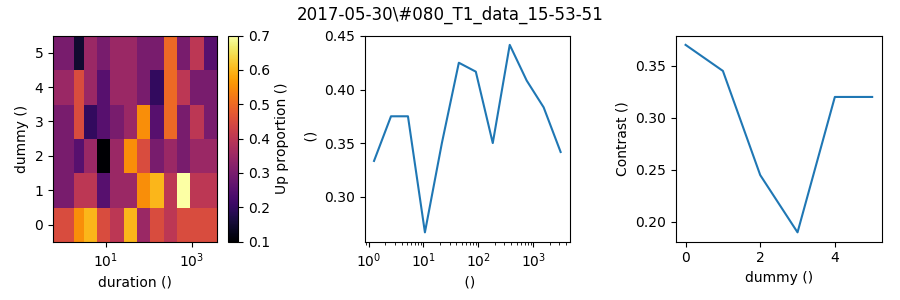

In [62]:
data = load_data(r'2017-05-30\#080_T1_data_15-53-51')
plot = MatPlot(subplots=3, figsize=(9, 3))
plot[0].add(data.up_proportion)
plot[1].add(data.duration_set[0], np.nanmean(data.up_proportion, 0))
plot[2].add(data.contrast)
plot[0].set_xscale('log')
plot[1].set_xscale('log')

Measurement went out of tune here, but it looks a bit like theres a descent at high durations

<IPython.core.display.Javascript object>


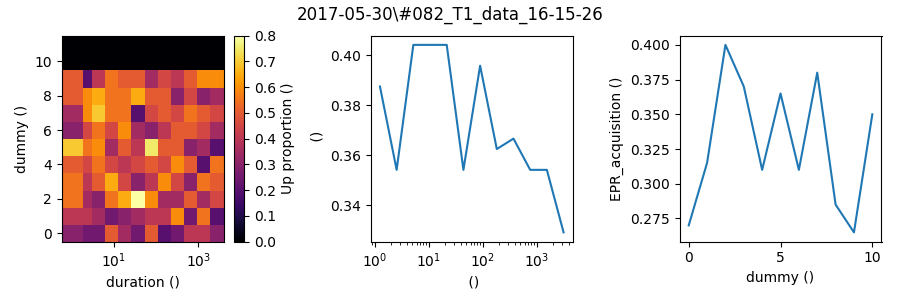

In [72]:
data = load_data(r'2017-05-30\#082_T1_data_16-15-26')
plot = MatPlot(subplots=3, figsize=(9, 3))
plot[0].add(data.up_proportion)
plot[1].add(data.duration_set[0], np.nanmean(data.up_proportion, 0))
plot[2].add(data.EPR_acquisition)
plot[0].set_xscale('log')
plot[1].set_xscale('log')

Performed several more scans. Even though it sort of looks as though there is a decrease, it seems to be within error margins

<IPython.core.display.Javascript object>


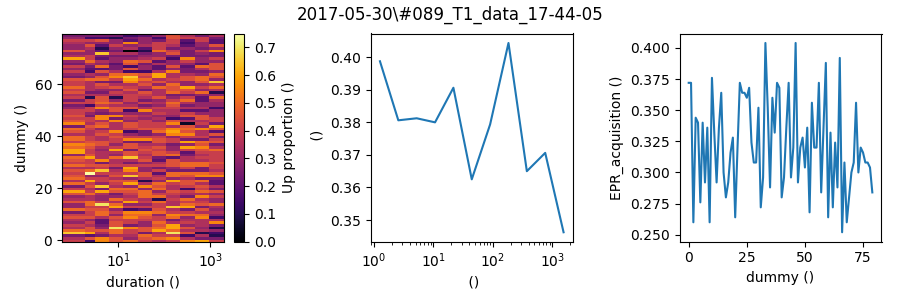

In [140]:
data = load_data(r'2017-05-30\#089_T1_data_17-44-05')

plot = MatPlot(subplots=3, figsize=(9, 3))
plot[0].add(data.up_proportion)
plot[1].add(data.duration_set[0], np.nanmean(data.up_proportion, 0))
plot[2].add(data.EPR_acquisition)
plot[0].set_xscale('log')
plot[1].set_xscale('log')

Tuning worked pretty well, not too much of a drift (~5mV) over a 3hr scan

<IPython.core.display.Javascript object>


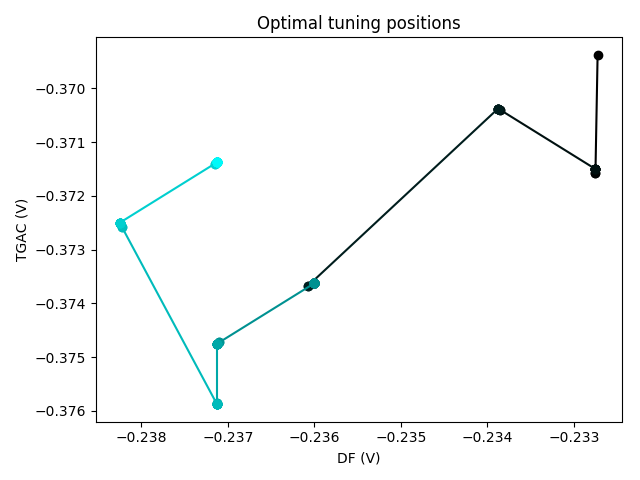

In [139]:
optimal_set_vals = data.optimal_set_vals
max_idx = np.where(~np.isnan(optimal_set_vals[:,0]))[0][-1]
optimal_set_vals = optimal_set_vals[:max_idx]
vals = [optimal_set_vals[:,0], optimal_set_vals[:,1]]
plt.figure()

# Segement plot and colour depending on T
s = 10 # Segment length
for i in range(0,len(vals[0])-1):
    plt.plot(vals[1][i:i+2], vals[0][i:i+2], 'o-',
            color=(0,i/len(vals[0]),i/len(vals[0])))
# plt.plot(*vals)
plt.xlabel('DF (V)')
plt.ylabel('TGAC (V)')
plt.title('Optimal tuning positions')
plt.tight_layout();

Performed EPR scans for low and high plunge duration. The contrast seems reasonably high in both cases.
This indicates that it is something with a long T1, perhaps a donor.

<IPython.core.display.Javascript object>


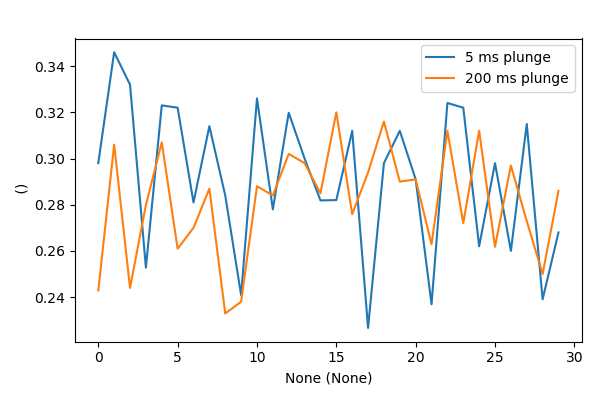

In [2]:
data = load_data(r'2017-05-31\#007_EPR_continuous_09-42-15')
plot = MatPlot(data.contrast[:,0], label='5 ms plunge')
plot.add(data.contrast[:,1], label='200 ms plunge')
plt.legend()

DC scan of area surrounding transition, including transition (green dot)

## DC scans for different DS values

<IPython.core.display.Javascript object>


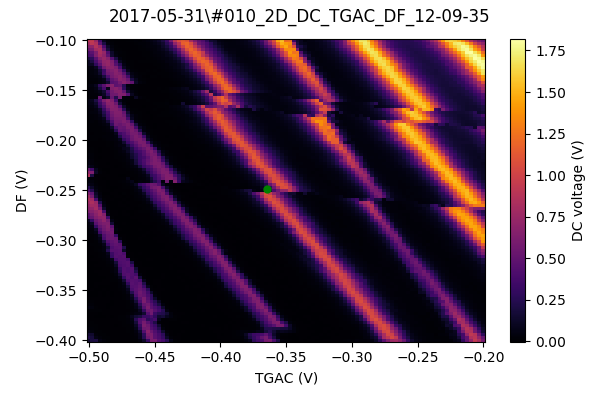

In [41]:
data = load_data(r'2017-05-31\#010_2D_DC_TGAC_DF_12-09-35')
DCPlot(data)
plt.plot(-0.36425, -0.2485, 'og', ms=5)

Performed several DC scans at different DS values to see how it influences the gate space.
These can be seen below in an animated figure.

As we decrease DS from its original value DS(0.55), a lower transition is creeping up and at some point intersects our transition at around DS(0.52).

At higher DS voltages, there is an intermediate region where a lot of transitions seem to be smeared out.
Thhis somehow disappears if we  increase DS further.

<IPython.core.display.Javascript object>


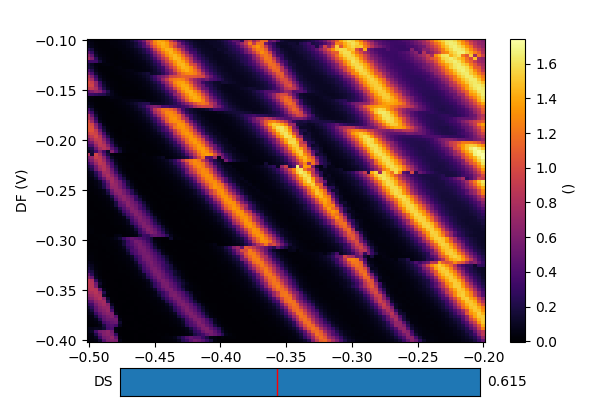

In [110]:
data = load_data(r'2017-05-31\#013_2D_DC_TGAC_DF_17-47-36')
plot_kwargs = {'x': data.TGAC_set[0,0],
               'y': data.DF_set[0],
               'xlabel': 'TGAC',
               'xunit': 'V',
               'ylabel': 'DF',
               'yunit': 'V'}

plot = MatPlot(data.DC_voltage[7], **plot_kwargs)

def update(value):
    idx = np.argmin(abs(data.DS_set.ndarray - value))
    value = data.DS_set[idx]
    slider.valtext.set_text(str(value))
    plot[0].clear()
    plot[0].add(data.DC_voltage[idx], **plot_kwargs)
    plot.update()

sliderax = plot.fig.add_axes([0.2, 0.01, 0.6, 0.07],
                             facecolor='yellow')
slider = mpl.widgets.Slider(sliderax, 'DS', 
                            data.DS_set[0], data.DS_set[-1], 
                            valinit=data.DS_set[7])
slider.on_changed(update)
slider.drawon = False


## ESR peak

Althbough the device is too jumpy to perform long ESR scans, we managed to perform a few smaller ones.
At two successive instances, we noticed a strong peak around 39.09 GHz.
The third scan did not show this peak, and the first scan did show a lot of jumpiness. 
This indicates that the ESR frequency is unstable, which could indicate that the nucleus flips a lot.

<IPython.core.display.Javascript object>


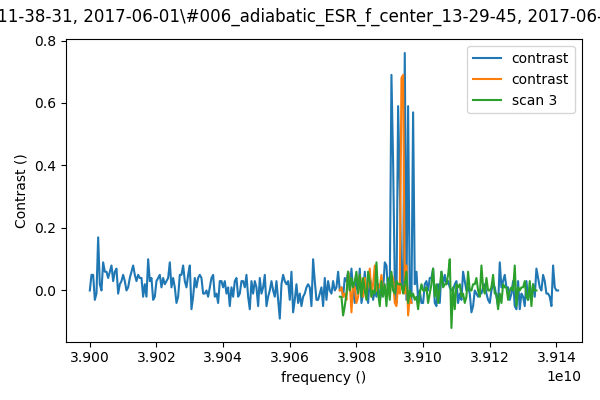

In [73]:
data = load_data(r'2017-06-01\#005_adiabatic_ESR_f_center_11-38-31')
plot = MatPlot(data.contrast, label='scan 1')

data = load_data(r'2017-06-01\#006_adiabatic_ESR_f_center_13-29-45')
plot.add(data.contrast, label='scan 2')

data = load_data(r'2017-06-01\#007_adiabatic_ESR_f_center_14-41-11')
plot.add(data.contrast, label='scan 3')
plt.legend()

# 3T measurements

## DC scans

Found good transition (~2ms blips) at following values:
    
{'DF': 0.609625,
 'DS': 0.609625,
 'LB': 0.49,
 'RB': 0.41,
 'SRC': 0.15,
 'TG': 1.8,
 'TGAC': 0.024}

In [77]:
data = load_data(r'2017-06-01\#007_adiabatic_ESR_f_center_14-41-11')
plot.add(data.contrast, label='scan 3')
plt.legend()

<IPython.core.display.Javascript object>


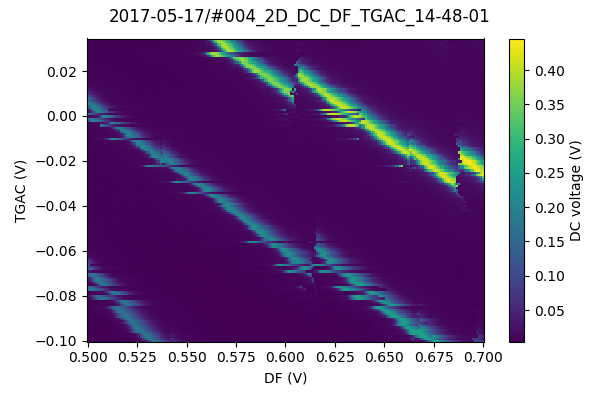

In [2]:
data = load_data('2017-05-17/#004_2D_DC_DF_TGAC_14-48-01')
plot = MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


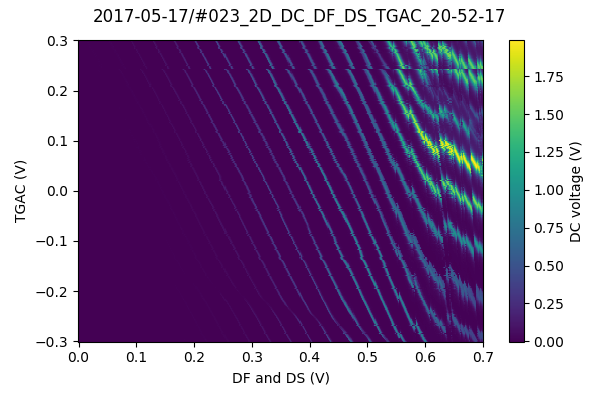

In [14]:
data = load_data('2017-05-17/#023_2D_DC_DF_DS_TGAC_20-52-17')
plot = MatPlot(data.DC_voltage)

## Variable read

Trying to get variable read scans for the point mentioned above.
The digitizer trace shows blips, but not necessarily at the beginning of the read stage.

<IPython.core.display.Javascript object>


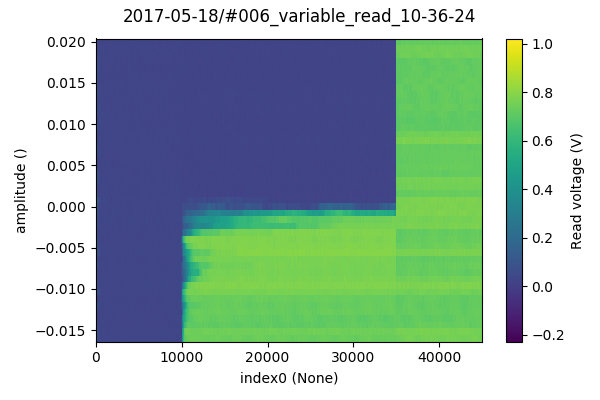

In [19]:
data = load_data('2017-05-18/#006_variable_read_10-36-24')
plot = qc.MatPlot(data.read_voltage)

Several read scans were performed, but no spin tail measured.

After this I navigated using TGAC versus DF_DS, trying to find a spot with good transitions.
However, nearly everywhere the transitions were much too fast or too slow.

## DF_DS versus TG

Decided to do another big scan, from this we could hopefully find some useful donors.

<IPython.core.display.Javascript object>


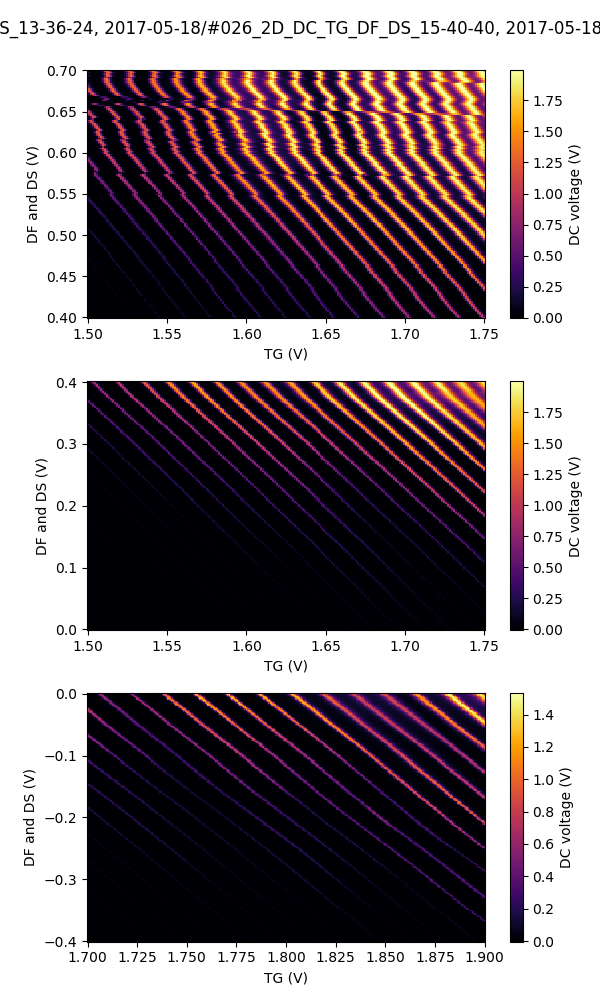

In [18]:
data = load_data('2017-05-18/#020_2D_DC_TG_DF_DS_13-36-24')
plot = MatPlot(data.DC_voltage, subplots=(3,1))

data = load_data('2017-05-18/#026_2D_DC_TG_DF_DS_15-40-40')
plot[1].add(data.DC_voltage)

data = load_data('2017-05-18/#031_2D_DC_TG_DF_DS_20-05-51')
plot[2].add(data.DC_voltage)

## Second variable read

Found a second donor with blips at 

{'DF': 0.692,
 'DS': 0.692,
 'LB': 0.55,
 'RB': 0.46,
 'SRC': 0.14,
 'TG': 1.555,
 'TGAC': 0.0}
 
 However, variable read again doesn't show any blips

<IPython.core.display.Javascript object>


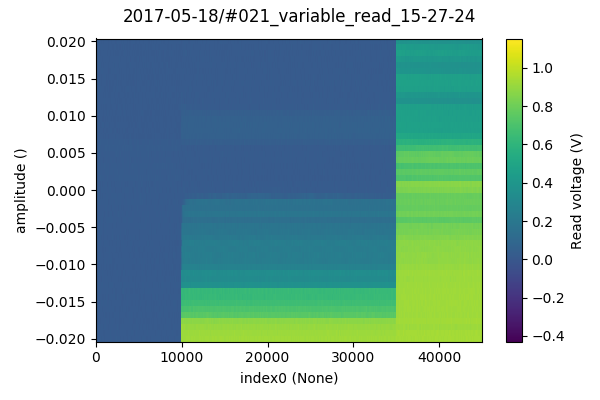

In [3]:
data = load_data('2017-05-18/#021_variable_read_15-27-24')
plot = MatPlot(data.read_voltage)

## DC scans with TGAC

<IPython.core.display.Javascript object>


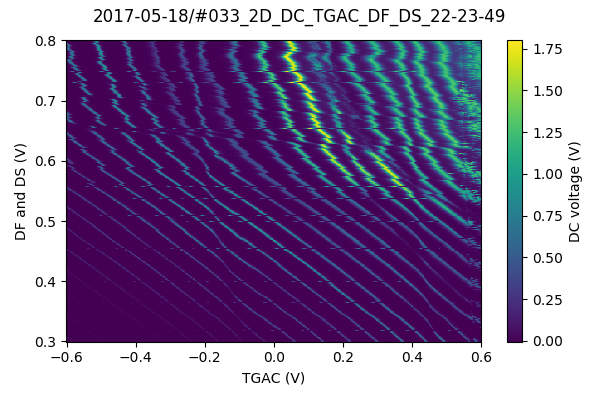

In [20]:
data = load_data('2017-05-18/#033_2D_DC_TGAC_DF_DS_22-23-49')
plot = MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


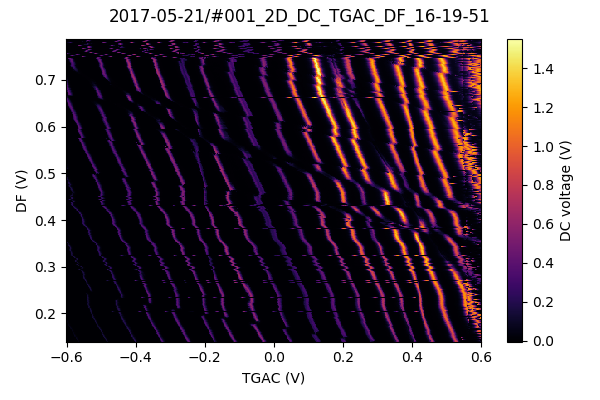

In [6]:
data = load_data('2017-05-21/#001_2D_DC_TGAC_DF_16-19-51')
plot = MatPlot(data.DC_voltage)

## Low DF transition

At low DF voltage there is a transition with fast but not too fast tunneling

<IPython.core.display.Javascript object>


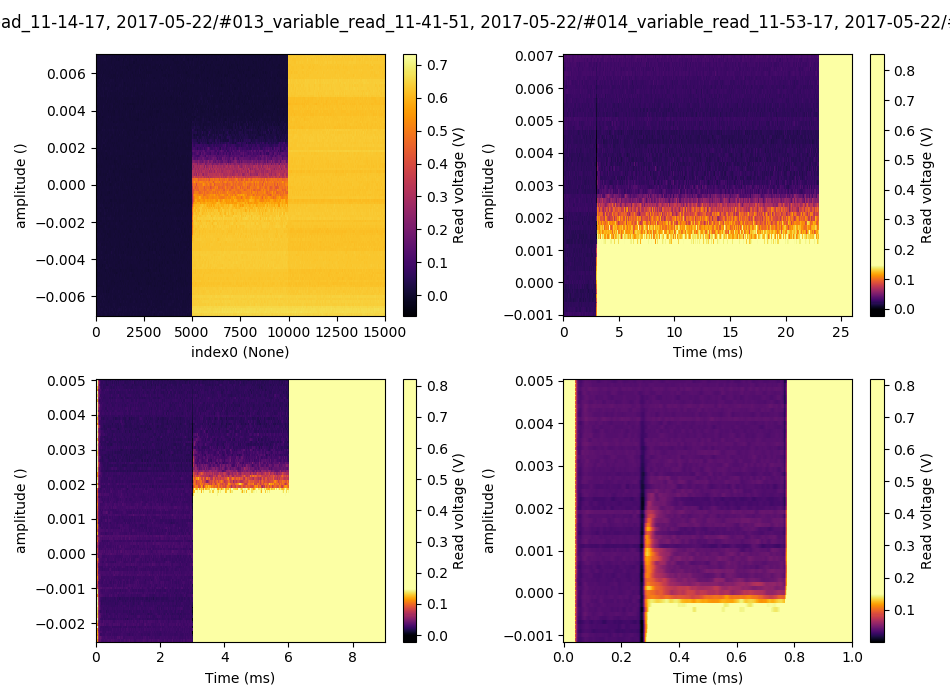

In [83]:
data = load_data('2017-05-22/#005_variable_read_11-14-17')
plot = MatPlot(subplots=(2, 2), figsize=(9.5, 7))
plot[0].add(data.read_voltage)

data = load_data('2017-05-22/#013_variable_read_11-41-51')
plot[1].add(data.read_voltage)
plot[1].qcodes_colorbar.set_clim(0, 0.15)

data = load_data('2017-05-22/#014_variable_read_11-53-17')
plot[2].add(data.read_voltage)
plot[2].qcodes_colorbar.set_clim(0, 0.15)

# data = load_data('2017-05-22/#016_variable_read_12-07-05')
# data = load_data('2017-05-22/#017_variable_read_12-14-55')
# data = load_data('2017-05-22/#021_variable_read_13-10-04')
data = load_data('2017-05-22/#022_variable_read_13-17-06')
plot[3].add(data.read_voltage)
plot[3].qcodes_colorbar.set_clim(0, 0.15)

<IPython.core.display.Javascript object>


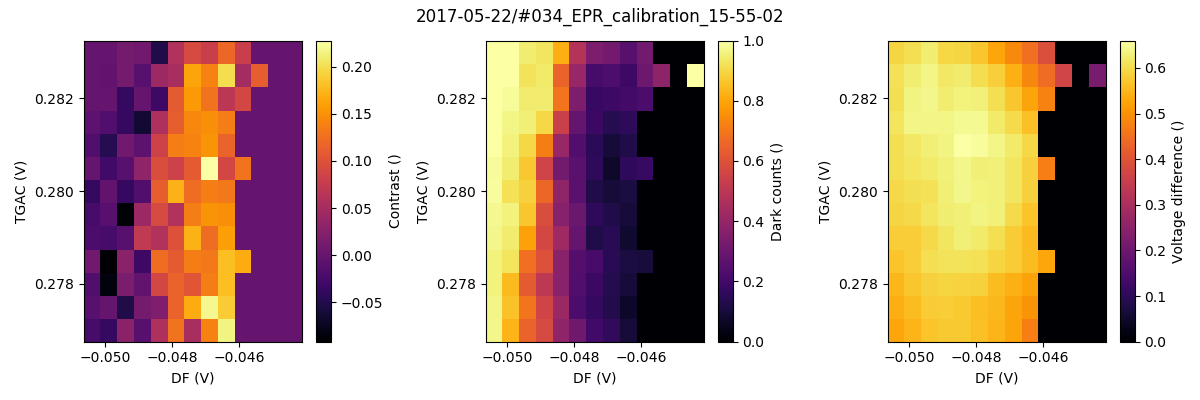

In [2]:
# data = load_data('2017-05-22/#029_EPR_calibration_14-00-56')
data = load_data('2017-05-22/#034_EPR_calibration_15-55-02')
CalibrationPlot(data)

## Retuning after connecting MW source

After adding the microwave, for some reason the charge stability diagram shifted.
At the previously-used values, the SET was completely conducting.
The barrier values needed to be reduced, as well as the SD bias.
It took a while before a good transition was found, but eventually a spin-tail was found.
I'm not sure if this is the same transition as previously, but the times are comparable

<IPython.core.display.Javascript object>


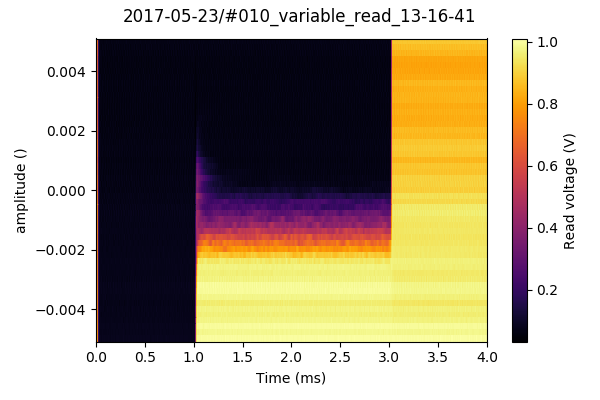

In [14]:
data = load_data('2017-05-23/#010_variable_read_13-16-41')
plot = MatPlot(data.read_voltage)

The contrast is also very good, much better than before (~0.2 max)! Might have something to do with new way of finding threshold voltage, or it is simply a different transition

<IPython.core.display.Javascript object>


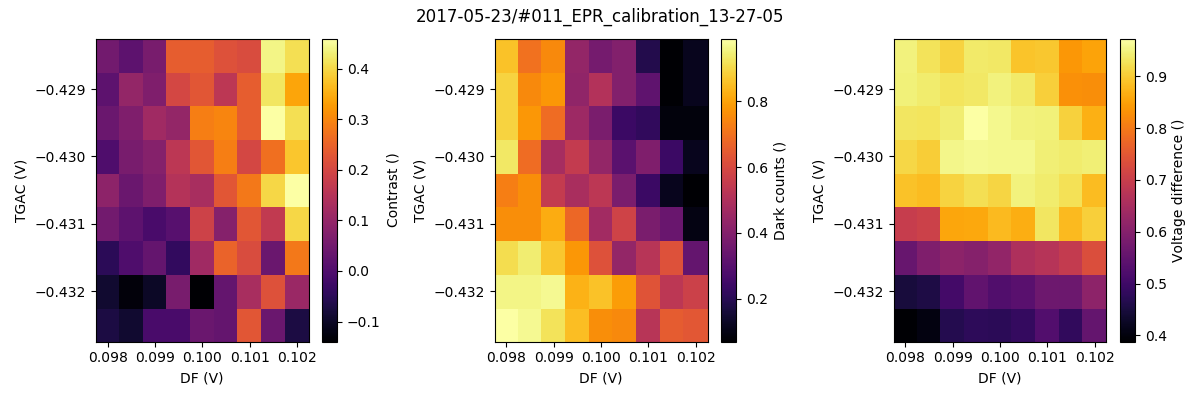

In [7]:
data = load_data('2017-05-23/#011_EPR_calibration_13-27-05')
CalibrationPlot(data)

<IPython.core.display.Javascript object>


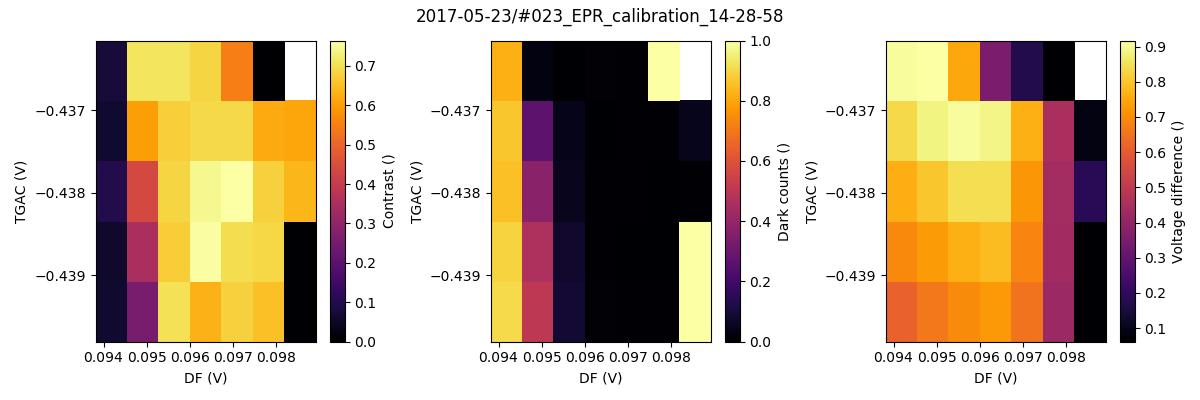

In [8]:
data = load_data('2017-05-23/#023_EPR_calibration_14-28-58')
CalibrationPlot(data)

# Third tuneup (Mateusz to Scarlett)

## Turnon

<IPython.core.display.Javascript object>


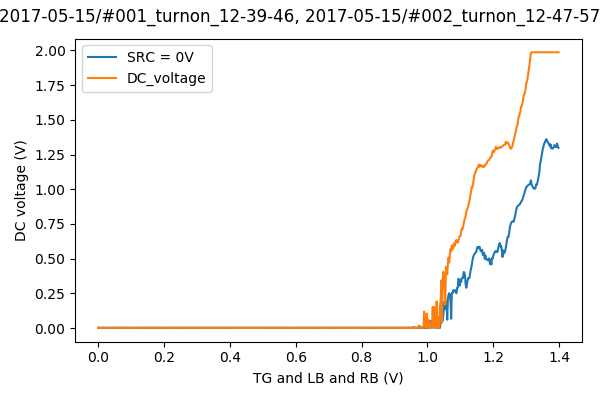

In [3]:
data = load_data('2017-05-15/#001_turnon_12-39-46')
plot = MatPlot(data.DC_voltage, label='SRC = 0V');
data = load_data('2017-05-15/#002_turnon_12-47-57')
plot.add(data.DC_voltage)
plt.legend()

## Pinchoff

<IPython.core.display.Javascript object>


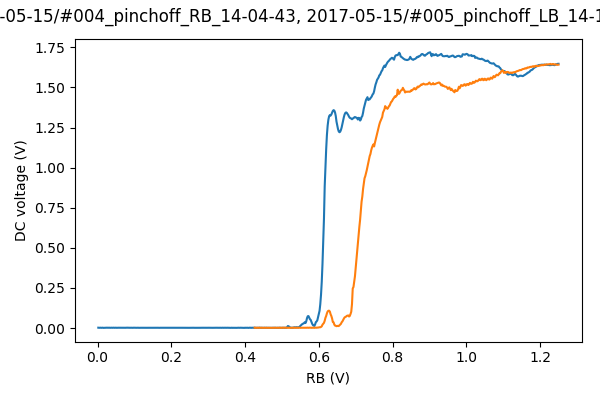

In [2]:
data = load_data('2017-05-15/#004_pinchoff_RB_14-04-43')
plot = MatPlot(data.DC_voltage, label='RB')
data = load_data('2017-05-15/#005_pinchoff_LB_14-11-22')
plot.add(data.DC_voltage, label='LB')

## Barrier-barrier scan

<IPython.core.display.Javascript object>


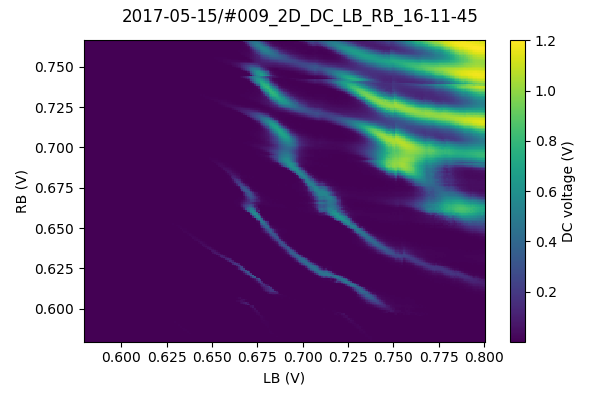

In [10]:
data = load_data('2017-05-15/#009_2D_DC_LB_RB_16-11-45')
plot = MatPlot(data.DC_voltage)
plot.add(data.DC_voltage)

## Tuning into DF_DS region

Trying to find good point for overnight DC scans

<IPython.core.display.Javascript object>


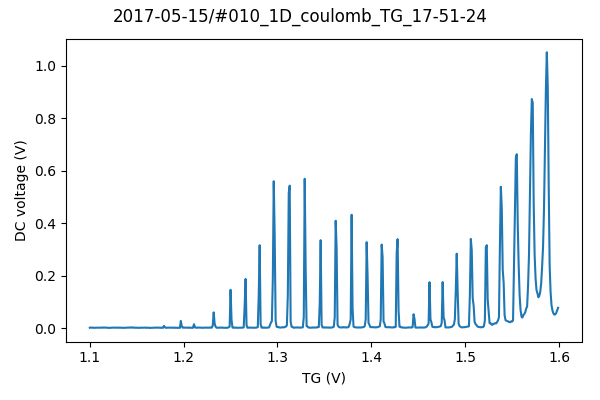

In [3]:
data = load_data('2017-05-15/#010_1D_coulomb_TG_17-51-24')
MatPlot(data.DC_voltage)

The measurements below show that it is quite hard to find a good spot where peaks can be measured for a large range of DF_DS vals.
For some reason above 0.4V, the SET island leaves Coulomb blockade

<IPython.core.display.Javascript object>


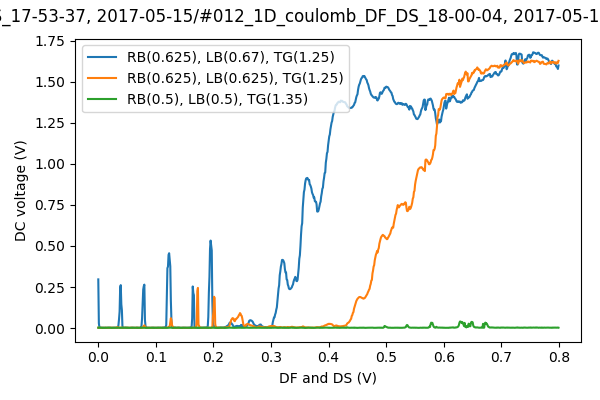

In [6]:
plot = MatPlot()
data = load_data('2017-05-15/#011_1D_coulomb_DF_DS_17-53-37')
plot.add(data.DC_voltage, label='RB(0.625), LB(0.67), TG(1.25)')

data = load_data('2017-05-15/#012_1D_coulomb_DF_DS_18-00-04')
plot.add(data.DC_voltage, label='RB(0.625), LB(0.625), TG(1.25)')

data = load_data('2017-05-15/#014_1D_coulomb_DF_DS_18-06-21')
plot.add(data.DC_voltage, label='RB(0.5), LB(0.5), TG(1.35)')
plt.legend()

Below different values of barrier gates are used.
The best peaks seem to be around LB(0.55), RB(0.45).
However, there is still the problem at high DF_DS

DataSet:
   data = load_data('2017-05-15/#026_TG_LB_RB_coulomb_DF_DS_19-12-56')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TG_set     | TG           | (7,)
   Setpoint | LB_RB_set  | LB_RB        | (7, 7)
   Measured | LB         | LB           | (7, 7)
   Measured | RB         | RB           | (7, 7)
   Setpoint | DF_DS_set  | DF_DS        | (7, 7, 900)
   Measured | DC_voltage | DC_voltage   | (7, 7, 900)


<IPython.core.display.Javascript object>


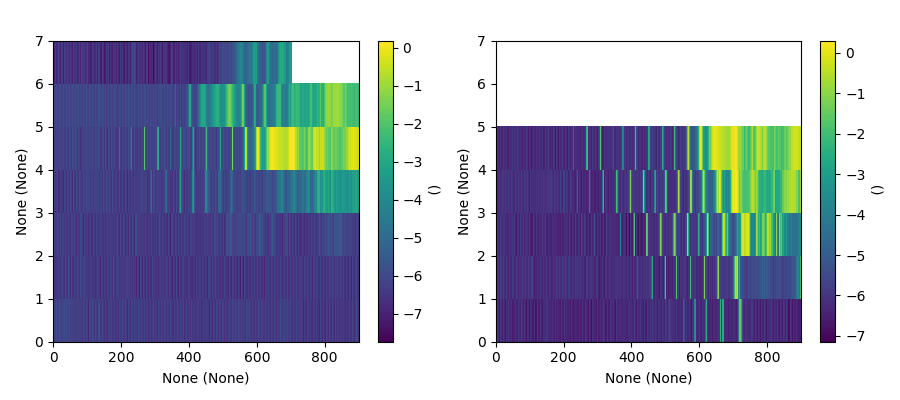

In [108]:
data = load_data('2017-05-15/#026_TG_LB_RB_coulomb_DF_DS_19-12-56')
print(data)
plot=MatPlot(subplots=2)
plot[0].add(np.log(np.abs(data.DC_voltage[4])))
plot[1].add(np.log(np.abs(data.DC_voltage[:,4])))

Picked fixed offset of LB = RB + 0.08. 
Varying LB, RB together versus TG shows values that are good.
Nevertheless, it still seems hard to get a good point

DataSet:
   data = load_data('2017-05-15/#029_TG_LB_RB_coulomb_DF_DS_20-58-23')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TG_set     | TG           | (7,)
   Setpoint | LB_RB_set  | LB_RB        | (7, 5)
   Measured | LB         | LB           | (7, 5)
   Measured | RB         | RB           | (7, 5)
   Setpoint | DF_DS_set  | DF_DS        | (7, 5, 900)
   Measured | DC_voltage | DC_voltage   | (7, 5, 900)


<IPython.core.display.Javascript object>


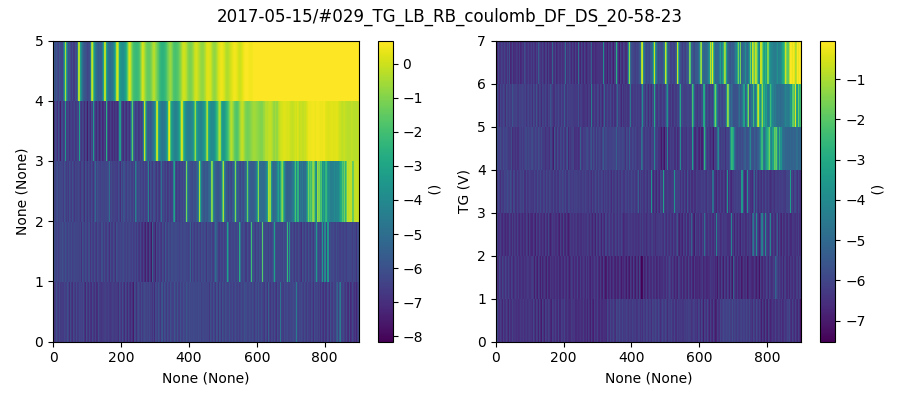

In [116]:
data = load_data('2017-05-15/#029_TG_LB_RB_coulomb_DF_DS_20-58-23')
print(data)
plot=MatPlot(subplots=2)
plot[0].add(np.log(np.abs(data.DC_voltage[6])))
plot[1].add(np.log(np.abs(data.DC_voltage[:,2])), y=data.TG_set)

Here twe scans are performed right after each other.
It is odd that the background value changed in between.

## Large DC scans

<IPython.core.display.Javascript object>


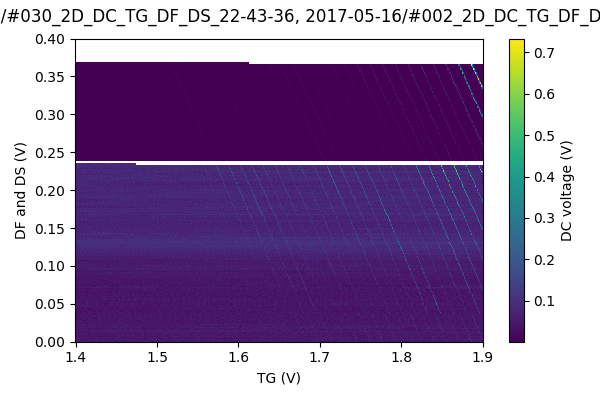

In [14]:
data = load_data('2017-05-15/#030_2D_DC_TG_DF_DS_22-43-36')
plot = MatPlot(data.DC_voltage)
data = load_data('2017-05-16/#002_2D_DC_TG_DF_DS_08-40-36')
plot.add(data.DC_voltage)
plt.ylim(0, 0.4);

Below a DC scan is performed for a wide range of DF_DS vs TG.
The peaks look good over the enter range, but I don't know why.
Maybe something shifted in between the two measurements above.

<IPython.core.display.Javascript object>


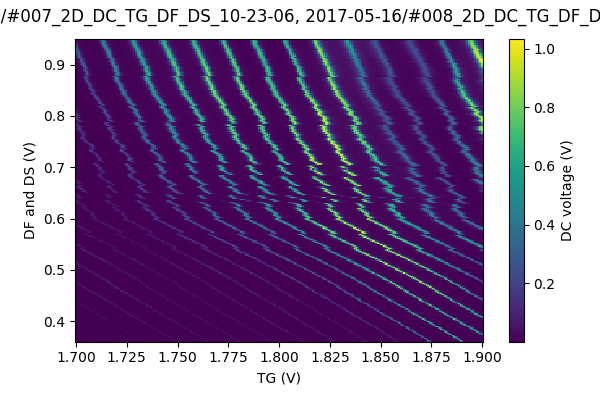

(0.36, 0.95)

In [22]:
data = load_data('2017-05-16/#007_2D_DC_TG_DF_DS_10-23-06')
plot = MatPlot(data.DC_voltage)
data = load_data('2017-05-16/#008_2D_DC_TG_DF_DS_12-01-48')
plot.add(data.DC_voltage)
plt.ylim(0.36, 0.95)

Next a scan of DF vs TGAC is performed. This can be used to compare with values found during live plotting

<IPython.core.display.Javascript object>


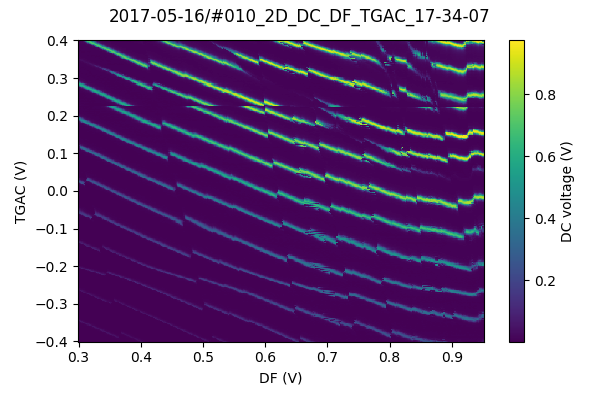

In [12]:
data = load_data('2017-05-16/#010_2D_DC_DF_TGAC_17-34-07')
MatPlot(data.DC_voltage)

# Tune-up after ramping to 7T (twice)

After ramping to 7T for Mateusz sample, the magnet quenched.
We then ramped to 7T again, after which we performed another DC scan

## Second DC scans

These were performed after second cooldown

<IPython.core.display.Javascript object>


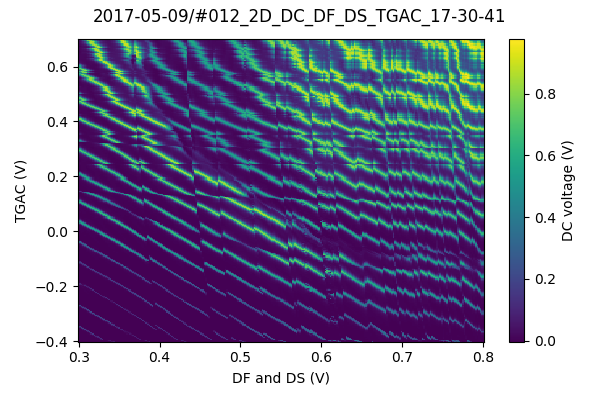

In [24]:
data = load_data('2017-05-09/#012_2D_DC_DF_DS_TGAC_17-30-41')
MatPlot(data.DC_voltage)

## DC scan

<IPython.core.display.Javascript object>


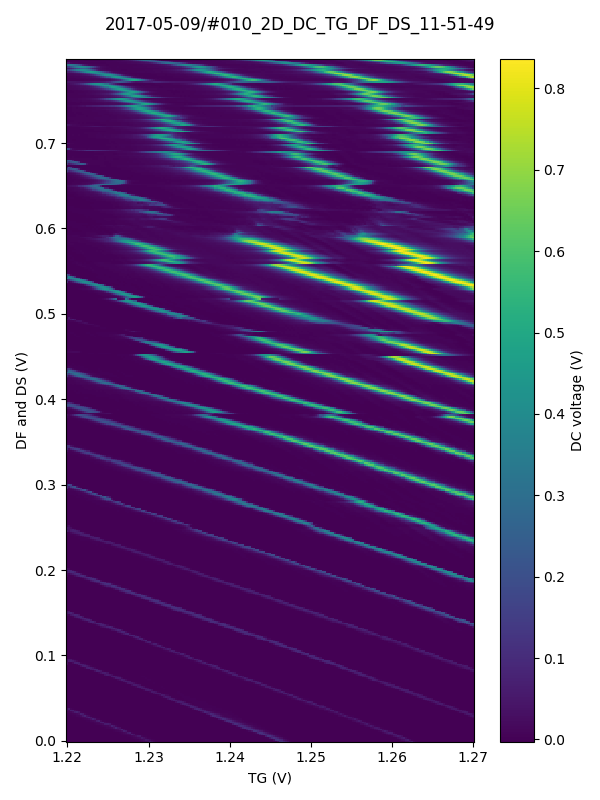

In [6]:
data = load_data('2017-05-09/#010_2D_DC_TG_DF_DS_11-51-49')
DCPlot(data, figsize=(6, 8))

# Initial tune-up

## Turnon

Initial turnon of the device is a success, starting just below 1V.
This measurement is done without SD bias.

Same measurement peformed with a SD bias of 0.15V.
We see very similar behaviour, with slightly earlier turnon

<IPython.core.display.Javascript object>


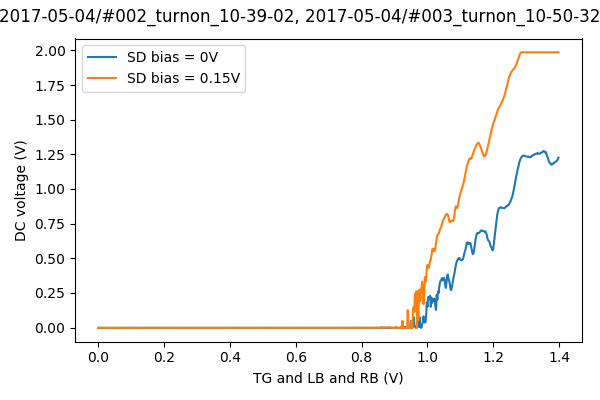

In [2]:
data_no_SRC = load_data('2017-05-04/#002_turnon_10-39-02')
plot = MatPlot(data_no_SRC.DC_voltage, label='SD bias = 0V')

data_SRC = load_data('2017-05-04/#003_turnon_10-50-32')
plot.add(data_SRC.DC_voltage, label='SD bias = 0.15V')
plt.legend();

## Pinchoff

Pinchoff is working for both barriers.
TG and other barrier are kept at 1.1V

<IPython.core.display.Javascript object>


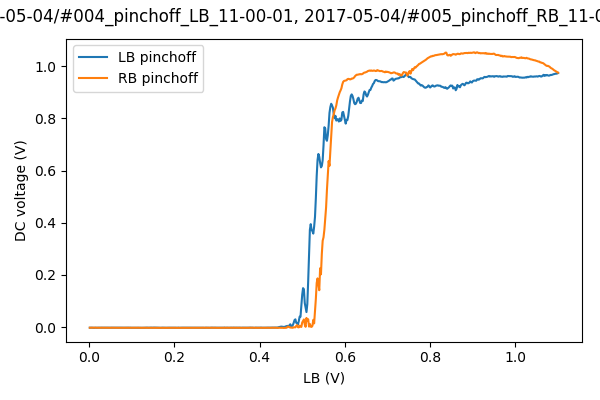

In [3]:
data_LB = load_data('2017-05-04/#004_pinchoff_LB_11-00-01')
plot = MatPlot(data_LB.DC_voltage, label='LB pinchoff')

data_RB = load_data('2017-05-04/#005_pinchoff_RB_11-04-37')
plot.add(data_RB.DC_voltage, label='RB pinchoff')

plt.legend();

## 1D Coulomb peaks

Measuring Coulomb peaks.
Both LB and RB are at 0.5V

<IPython.core.display.Javascript object>


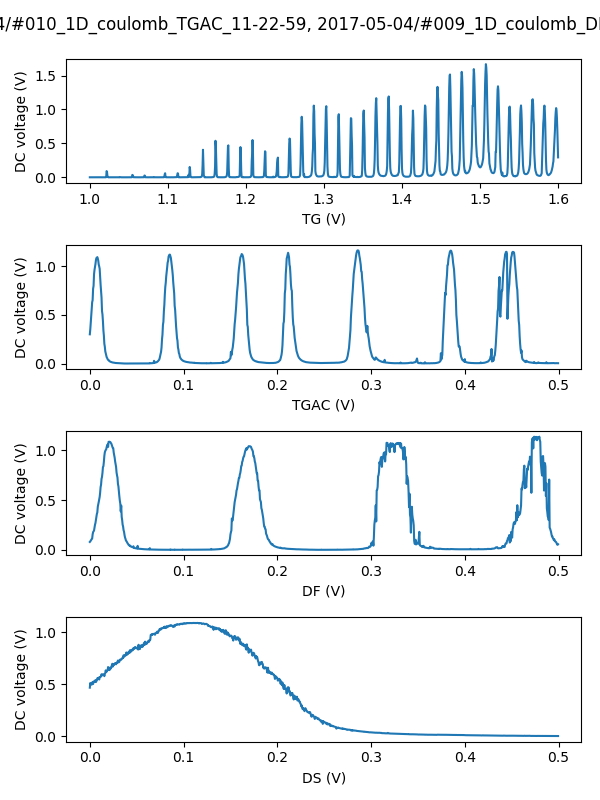

In [4]:
plot = qc.MatPlot(subplots=(4,1), figsize=(6,8))

data_TG = load_data('2017-05-04/#007_1D_coulomb_TG_11-11-25')
plot[0].add(data_TG.DC_voltage)

data_TGAC = load_data('2017-05-04/#010_1D_coulomb_TGAC_11-22-59')
plot[1].add(data_TGAC.DC_voltage)

data_DF = load_data('2017-05-04/#009_1D_coulomb_DF_11-18-27')
plot[2].add(data_DF.DC_voltage)

data_DS = load_data('2017-05-04/#011_1D_coulomb_DS_11-25-23')
plot[3].add(data_DS.DC_voltage)

plot.tight_layout();

DS seems to be very weakly coupled. 
This is strange, also because when Mateusz measured it, it was much stronger coupled.
We measured the output of the DS sim module, and of the divider, and they are both working properly.

Scan after reconnecting shows same behaviour

<IPython.core.display.Javascript object>


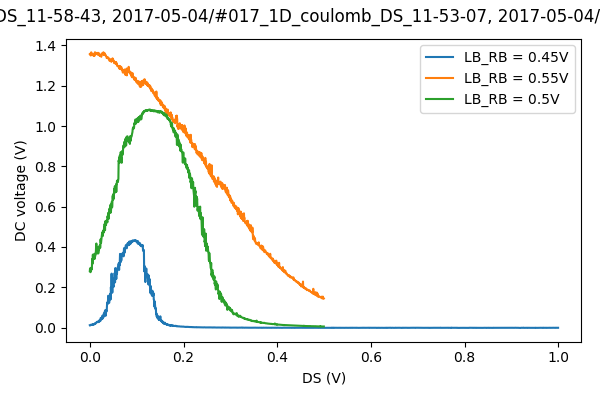

In [5]:
plot = MatPlot()

data = load_data('2017-05-04/#019_1D_coulomb_DS_11-58-43')
plot.add(data.DC_voltage, label='LB_RB = 0.45V')

data = load_data('2017-05-04/#017_1D_coulomb_DS_11-53-07')
plot.add(data.DC_voltage, label='LB_RB = 0.55V')

data = load_data('2017-05-04/#014_1D_coulomb_DS_11-45-31')
plot.add(data.DC_voltage, label='LB_RB = 0.5V')
plt.legend();

## Barrier-barrier scan

<IPython.core.display.Javascript object>


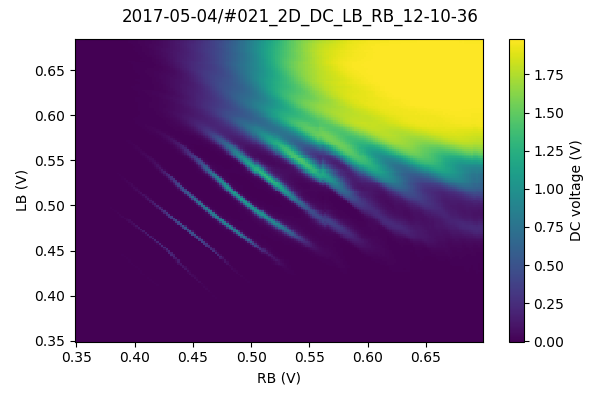

In [6]:
data = load_data('2017-05-04/#021_2D_DC_LB_RB_12-10-36')
MatPlot(data.DC_voltage);

Another barrier-barrier scan with TG(1.5)

<IPython.core.display.Javascript object>


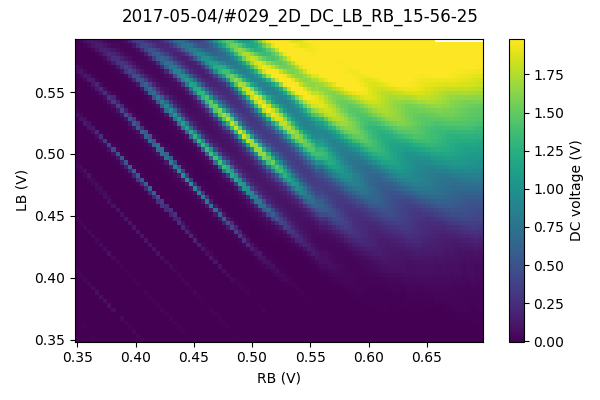

In [7]:
data = load_data('2017-05-04/#029_2D_DC_LB_RB_15-56-25')
MatPlot(data.DC_voltage);

## Individual LDS RDS scans

We separated DS (donor slow) into LDS and RDS, varied each and measured the influence on the output.

The results clearly show that the system is completely unresponsive to LDS.
Looking back at the logbook, we realized that LDS was connected to line 10, while it should have been connected to line 11.

<IPython.core.display.Javascript object>


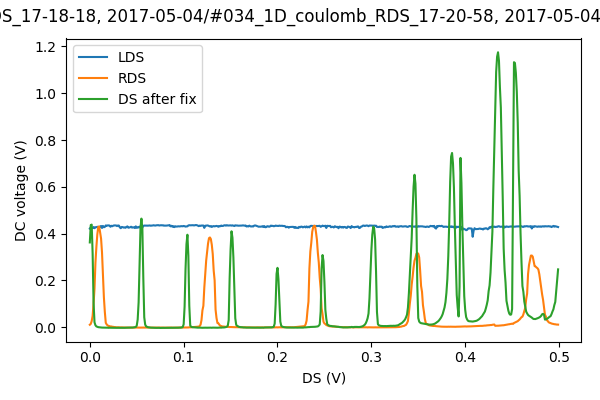

In [15]:
data = load_data('2017-05-04/#033_1D_coulomb_DS_17-18-18')
plot = MatPlot(data.DC_voltage, label='LDS')
data = load_data('2017-05-04/#034_1D_coulomb_RDS_17-20-58')
plot.add(data.DC_voltage, label='RDS')
data = load_data('2017-05-04/#035_1D_coulomb_DS_17-31-55')
plot.add(data.DC_voltage, label='DS after fix')

plt.legend();

## Setting up for overnight scans

<IPython.core.display.Javascript object>


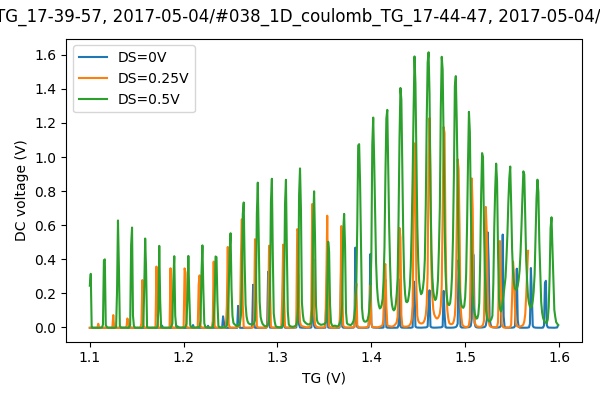

In [14]:
data = load_data('2017-05-04/#036_1D_coulomb_TG_17-39-57')
plot = MatPlot(data.DC_voltage, label='DS=0V')

data = load_data('2017-05-04/#038_1D_coulomb_TG_17-44-47')
plot.add(data.DC_voltage, label='DS=0.25V')

data = load_data('2017-05-04/#037_1D_coulomb_TG_17-42-36')
plot.add(data.DC_voltage, label='DS=0.5V')
plt.legend();

## 2D Scans

### TG vs DS

<IPython.core.display.Javascript object>


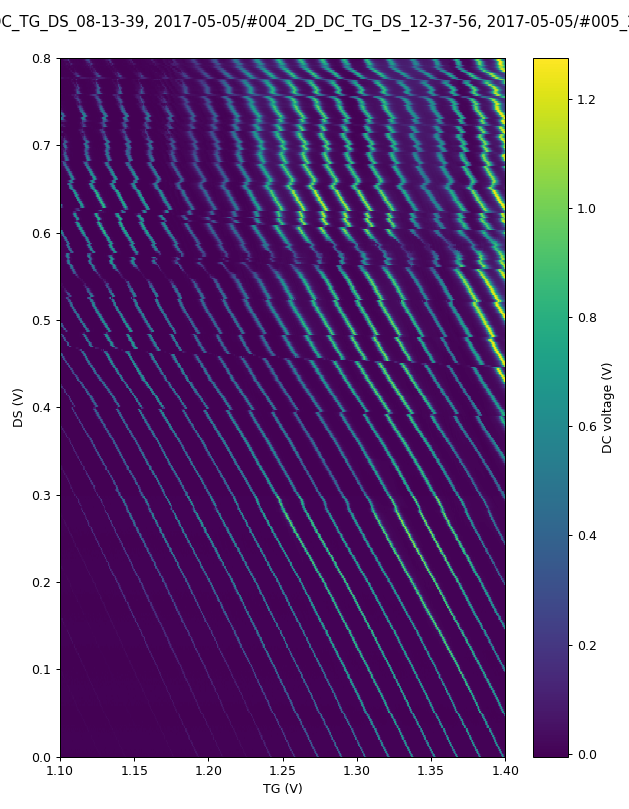

In [9]:
data = load_data('2017-05-04/#039_2D_DC_TG_DS_17-55-06')
plot = MatPlot(data.DC_voltage, figsize=(7,9))
# x_range = [np.min(data.TG_set[0]), np.max(data.TG_set[0])]
# y_max = np.nanmax(data.DS_set)
# plot[0].plot(x_range, [y_max, y_max], 'r-.', linewidth=.5)

data = load_data('2017-05-05/#002_2D_DC_TG_DS_08-13-39')
plot.add(data.DC_voltage)

data = load_data('2017-05-05/#004_2D_DC_TG_DS_12-37-56')
plot.add(data.DC_voltage)

data = load_data('2017-05-05/#005_2D_DC_TG_DS_15-45-20')
plot.add(data.DC_voltage)

data = load_data('2017-05-05/#007_2D_DC_TG_DS_17-38-50')
plot.add(data.DC_voltage)

plt.ylim(0, 0.8);
plot.tight_layout();

### TG vs DF and DS

<IPython.core.display.Javascript object>


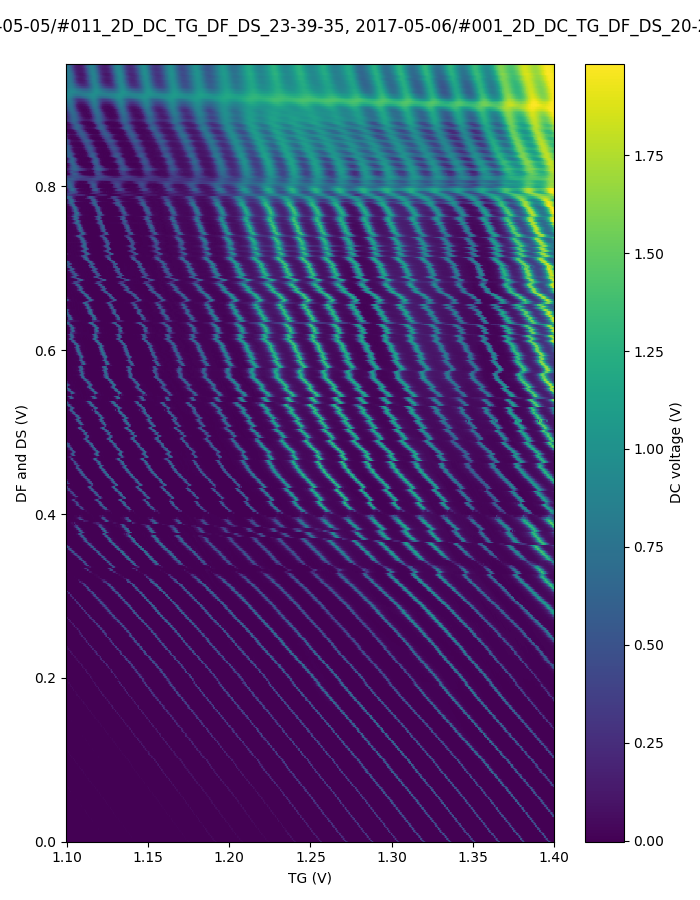

In [13]:
data = load_data('2017-05-05/#011_2D_DC_TG_DF_DS_23-39-35')
plot = MatPlot(data.DC_voltage, figsize=(7,9))

data = load_data('2017-05-06/#001_2D_DC_TG_DF_DS_20-25-11')
plot.add(data.DC_voltage)

plt.ylim(0, 0.95)
plot.tight_layout()

### TG vs DF

<IPython.core.display.Javascript object>


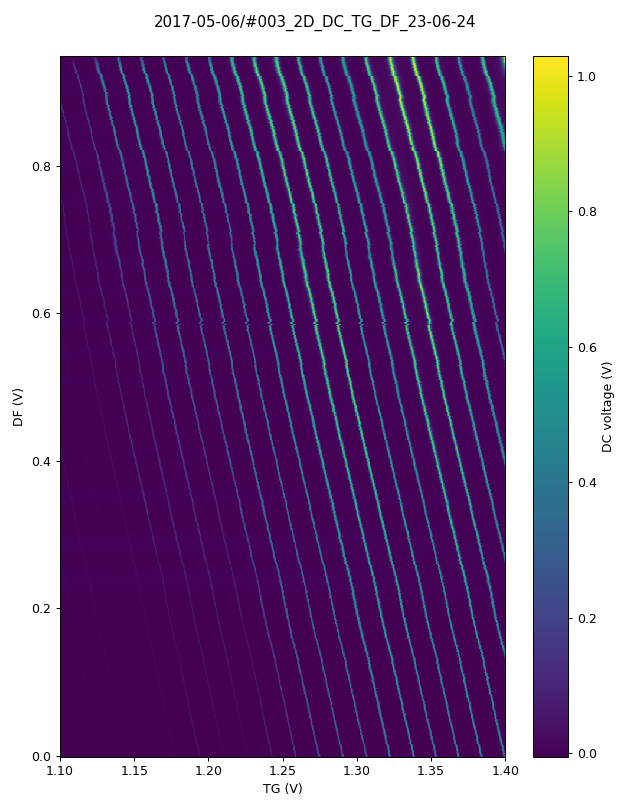

In [23]:
data = load_data('2017-05-06/#003_2D_DC_TG_DF_23-06-24')
plot = MatPlot(data.DC_voltage, figsize=(7,9))
plot.tight_layout()

### TGAC vs DS

<IPython.core.display.Javascript object>


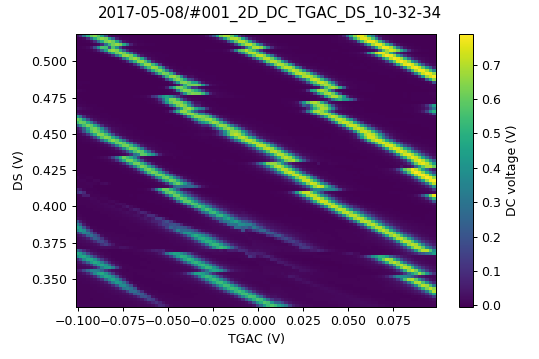

In [24]:
data = load_data('2017-05-08/#001_2D_DC_TGAC_DS_10-32-34')
plot = MatPlot(data.DC_voltage)